In [2]:
import onnx
import onnxruntime
import numpy as np
from onnxruntime.datasets import get_example

* get_example: retrieve the absolute file name of an example
* シグモイドのパスを渡します

In [3]:
example_model = get_example("sigmoid.onnx")
sess = onnxruntime.InferenceSession(example_model, providers=['CPUExecutionProvider'])

In [4]:
model = onnx.load(example_model)
onnx.checker.check_model(model)
print(onnx.helper.printable_graph(model.graph))

graph test_sigmoid (
  %x[FLOAT, 3x4x5]
) {
  %y = Sigmoid(%x)
  return %y
}


> 入力次元が(3,4,5)でシグモイド関数を適用して出力する

In [5]:
input_name = sess.get_inputs()[0].name
print("Input name :", input_name)
input_shape = sess.get_inputs()[0].shape
print("Input shape :", input_shape)
input_type = sess.get_inputs()[0].type
print("Input type :", input_type)

Input name : x
Input shape : [3, 4, 5]
Input type : tensor(float)


In [6]:
output_name = sess.get_outputs()[0].name
print("Output name :", output_name)
output_shape = sess.get_outputs()[0].shape
print("Output shape :", output_shape)
output_type = sess.get_outputs()[0].type
print("Output type :", output_type)

Output name : y
Output shape : [3, 4, 5]
Output type : tensor(float)


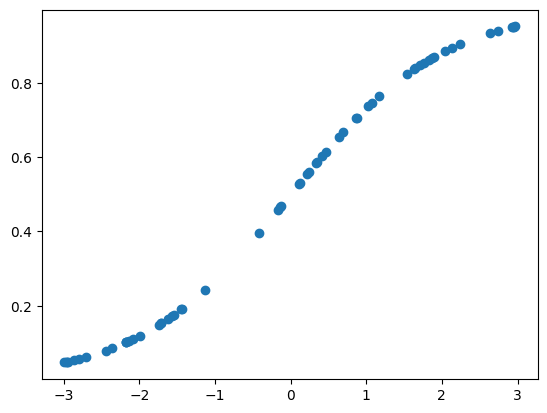

In [7]:
import matplotlib.pyplot as plt
x = np.random.random(input_shape) * 6 -3
x = x.astype(np.float32)

# runメソッドでONNXを動かす
result = sess.run([output_name], {input_name: x})
plt.scatter(x.reshape(-1), result[0].reshape(-1))